**Student name: Giorgi Guledani**

**Student ID: 20193667**

# Lecture 1: Exploratory Data Analysis

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

articles = pd.read_csv("datasets/articles.csv")
customers = pd.read_csv("datasets/customers.csv")
sample_submission = pd.read_csv("datasets/sample_submission.csv")
transactions_train = pd.read_csv("datasets/transactions_train.csv")


# General functions

In [3]:
def print_num_value_count(dataset, col, value):
    print(f"Amount of value {value} in {col}: {(dataset[col] == value).sum()}")
    

def missing_values(dataset):
    for column in dataset.columns:
    # Calculate the percentage of missing values in the column
        missing_values = dataset[column].isna().sum()
        missing_percentage = (missing_values / len(dataset)) * 100
        if missing_percentage > 0:
            print(f"Column '{column}' has { missing_values} missing values ({missing_percentage:.2f}%).")
            
def print_inconsistencies(dataset, col_pairs):
    for left_col, right_col in col_pairs:
            cols = get_inconsistencies(dataset, left_col, right_col)
            if len(cols) > 0:
                print(f"{left_col} -> {right_col} contains {len(cols)} inconsistencies.")
                print(cols)
            
def get_inconsistencies(dataset, left_col, right_col):
            # Drop duplicate pairs and select rows that contain duplicates in right column
            cols = dataset[[left_col, right_col]].drop_duplicates()
            cols = cols[cols.duplicated(right_col,  keep=False)] 
            return cols

# Articles

In [4]:
articles.head()

,article_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,...,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
0,108775015,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,9,Black,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
1,108775044,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,10,White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
2,108775051,108775,Strap top (1),253,Vest top,Garment Upper body,1010017,Stripe,11,Off White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
3,110065001,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,9,Black,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."
4,110065002,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,10,White,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."


In [5]:
articles.describe()

,article_id,product_code,product_type_no,graphical_appearance_no,colour_group_code,perceived_colour_value_id,perceived_colour_master_id,department_no,index_group_no,section_no,garment_group_no
count,1.055420e+05,105542.000000,105542.000000,1.055420e+05,105542.000000,105542.000000,105542.000000,105542.000000,105542.000000,105542.000000,105542.000000
mean,6.984246e+08,698424.563378,234.861875,1.009515e+06,32.233822,3.206183,7.807972,4532.777833,3.171534,42.664219,1010.438290
std,1.284624e+08,128462.384432,75.049308,2.241359e+04,28.086154,1.563839,5.376727,2712.692011,4.353234,23.260105,6.731023
min,1.087750e+08,108775.000000,-1.000000,-1.000000e+00,-1.000000,-1.000000,-1.000000,1201.000000,1.000000,2.000000,1001.000000
25%,6.169925e+08,616992.500000,252.000000,1.010008e+06,9.000000,2.000000,4.000000,1676.000000,1.000000,20.000000,1005.000000
50%,7.022130e+08,702213.000000,259.000000,1.010016e+06,14.000000,4.000000,5.000000,4222.000000,2.000000,46.000000,1009.000000
75%,7.967030e+08,796703.000000,272.000000,1.010016e+06,52.000000,4.000000,11.000000,7389.000000,4.000000,61.000000,1017.000000
max,9.594610e+08,959461.000000,762.000000,1.010029e+06,93.000000,7.000000,20.000000,9989.000000,26.000000,97.000000,1025.000000


We can see that some columns values contain -1 values where it shouldn't be the case, but the columns containing them do not seem all too important:

In [6]:
articles.min(numeric_only=True)

article_id                    108775015
product_code                     108775
product_type_no                      -1
graphical_appearance_no              -1
colour_group_code                    -1
perceived_colour_value_id            -1
perceived_colour_master_id           -1
department_no                      1201
index_group_no                        1
section_no                            2
garment_group_no                   1001
dtype: int64

Let's observe how severe this is:

In [7]:
print_num_value_count(articles, "product_type_no", -1)
print_num_value_count(articles, "graphical_appearance_no", -1)
print_num_value_count(articles, "colour_group_code", -1)
print_num_value_count(articles, "perceived_colour_value_id", -1)
print_num_value_count(articles, "perceived_colour_master_id", -1)


Amount of value -1 in product_type_no: 121
Amount of value -1 in graphical_appearance_no: 52
Amount of value -1 in colour_group_code: 28
Amount of value -1 in perceived_colour_value_id: 28
Amount of value -1 in perceived_colour_master_id: 685


There also aren't many, this isn't a problem.

In [8]:
articles.max(numeric_only=True)

article_id                    959461001
product_code                     959461
product_type_no                     762
graphical_appearance_no         1010029
colour_group_code                    93
perceived_colour_value_id             7
perceived_colour_master_id           20
department_no                      9989
index_group_no                       26
section_no                           97
garment_group_no                   1025
dtype: int64

In [9]:
missing_values(articles)

Column 'detail_desc' has 416 missing values (0.39%).


In [10]:
non_matches = (articles['article_id'].astype(str).str[:6] != articles['product_code'].astype(str)).sum()
print(f"Number of article_id (first 6 digits) not matching product_code: {non_matches}.")


Number of article_id (first 6 digits) not matching product_code: 0.


In [11]:
col_pairs = {
        ("colour_group_code", "colour_group_name"),
        ("department_no","department_name"),
        ("garment_group_no", "garment_group_name"),
        ("graphical_appearance_no","graphical_appearance_name"),
        ("index_code","index_name"),
        ("index_group_no","index_group_name"),
        ("perceived_colour_master_id","perceived_colour_master_name"),
        ("perceived_colour_value_id","perceived_colour_value_name"),
        ("product_type_no","product_type_name"),
        ("section_no","section_name"),

}
print_inconsistencies(articles, col_pairs)


section_no -> section_name contains 2 inconsistencies.
       section_no  section_name
38956           4  Ladies Other
43598          17  Ladies Other
department_no -> department_name contains 71 inconsistencies.
       department_no           department_name
0               1676              Jersey Basic
16              5883              Jersey Basic
23              2032                    Jersey
28              4342  EQ & Special Collections
121             3509                     Belts
...              ...                       ...
11932           7520                  Knitwear
20908           3708                Loungewear
26661           1778         OL Extended Sizes
26948           3941               Accessories
34641           7952            Jersey License

[71 rows x 2 columns]
product_type_no -> product_type_name contains 2 inconsistencies.
     product_type_no product_type_name
36               532          Umbrella
719               83          Umbrella


# Customers

In [12]:
customers.describe()

,FN,Active,age
count,476930.0,464404.0,1.356119e+06
mean,1.0,1.0,3.638696e+01
std,0.0,0.0,1.431363e+01
min,1.0,1.0,1.600000e+01
25%,1.0,1.0,2.400000e+01
50%,1.0,1.0,3.200000e+01
75%,1.0,1.0,4.900000e+01
max,1.0,1.0,9.900000e+01


In [13]:
customers.head()

,customer_id,FN,Active,club_member_status,fashion_news_frequency,age,postal_code
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,NaN,NaN,ACTIVE,NONE,49.0,52043ee2162cf5aa7ee79974281641c6f11a68d276429a...
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,NaN,NaN,ACTIVE,NONE,25.0,2973abc54daa8a5f8ccfe9362140c63247c5eee03f1d93...
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,NaN,NaN,ACTIVE,NONE,24.0,64f17e6a330a85798e4998f62d0930d14db8db1c054af6...
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,NaN,NaN,ACTIVE,NONE,54.0,5d36574f52495e81f019b680c843c443bd343d5ca5b1c2...
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,1.0,1.0,ACTIVE,Regularly,52.0,25fa5ddee9aac01b35208d01736e57942317d756b32ddd...


In [14]:
missing_values(customers)

Column 'FN' has 895050 missing values (65.24%).
Column 'Active' has 907576 missing values (66.15%).
Column 'club_member_status' has 6062 missing values (0.44%).
Column 'fashion_news_frequency' has 16011 missing values (1.17%).
Column 'age' has 15861 missing values (1.16%).


In [15]:
customers["FN"].value_counts(dropna=False)

FN
NaN    895050
1.0    476930
Name: count, dtype: int64

In [16]:
customers["Active"].value_counts(dropna=False)

Active
NaN    907576
1.0    464404
Name: count, dtype: int64

Both "FN" and "Active" contain boolean values that only consists of either 1 or NaN. We can just replace the NaN values with 0's.

In [17]:
customers["fashion_news_frequency"].value_counts(dropna=False)


fashion_news_frequency
NONE         877711
Regularly    477416
NaN           16011
Monthly         842
Name: count, dtype: int64

In [18]:
customers["age"].value_counts(dropna=False)


age
21.0    67530
24.0    56124
20.0    55196
25.0    54989
23.0    54867
        ...  
98.0        7
97.0        4
93.0        4
96.0        3
94.0        3
Name: count, Length: 85, dtype: int64

The age distribution does make sense and peak ages for online E-commerce (20 - 34) is supported by statistics (https://ec.europa.eu/eurostat/statistics-explained/index.php?title=E-commerce_statistics_for_individuals):

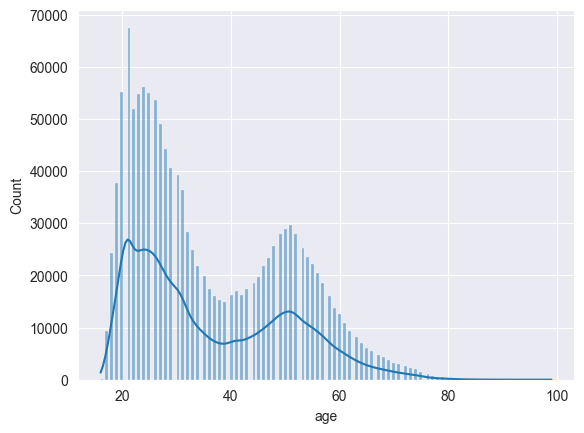

In [19]:
sns.histplot(customers["age"], kde=True)
plt.show()


It is weird how over 120k customers all share the same postal code, out of 350k registered ones. These could be botted accounts.


In [20]:
customers["postal_code"].value_counts(dropna=False)


postal_code
2c29ae653a9282cce4151bd87643c907644e09541abc28ae87dea0d1f6603b1c    120303
cc4ed85e30f4977dae47662ddc468cd2eec11472de6fac5ec985080fd92243c8       261
714976379549eb90aae4a71bca6c7402cc646ae7c40f6c1cb91d4b5a18623fc1       159
7c1fa3b0ec1d37ce2c3f34f63bd792f3b4494f324b6be5d1e4ba6a75456b96a7       157
5b7eb31eabebd3277de632b82267286d847fd5d44287ee150bb4206b48439145       156
                                                                     ...  
16dd7e391f305b54c01ffed87c189e33de83158d0a808d1b346222703742f638         1
5ce1c699380b3c13655347c9636043f5e64ec2538a1ee7d42dd253a584577630         1
afdedc642d01efeefec6fc8d3394724a71888ebd0ff0311eff6f34946589479d         1
4c8838d278d23029c920b9684fa4cf30a532428a445afb300eeb288685cf00e1         1
0a1a03306fb2f62164c2a439b38c0caa64b40deaae868799ccb93ac69444b79d         1
Name: count, Length: 352899, dtype: int64

Let's see if these possibly botted accounts purchased anything:

In [30]:
customers["customer_id"].isin(transactions_train["customer_id"]).value_counts(normalize=True)



customer_id
True     0.992931
False    0.007069
Name: proportion, dtype: float64

Over 99% of all customers purchased atleast once, so it's possible that these botted accounts abuse promotions and discounts.

Let's look at whether the rate they bought online:

In [47]:
botted_customers = customers[["customer_id", "postal_code"]][customers["postal_code"] == "2c29ae653a9282cce4151bd87643c907644e09541abc28ae87dea0d1f6603b1c"]
unique_customers = botted_customers["customer_id"].nunique()
print(f"Amount of unique 'botted'customers: {unique_customers}")
botted_transactions = transactions_train[transactions_train["customer_id"].isin(botted_customers["customer_id"])]
botted_transactions["sales_channel_id"].value_counts(normalize=True)

Amount of unique 'botted'customers: 120303


sales_channel_id
1    0.785396
2    0.214604
Name: proportion, dtype: float64

We compare this with the general rate (transactions without the bots):

In [36]:
other_customers = customers[["customer_id", "postal_code"]][customers["postal_code"] != "2c29ae653a9282cce4151bd87643c907644e09541abc28ae87dea0d1f6603b1c"]
other_transactions = transactions_train[transactions_train["customer_id"].isin(other_customers["customer_id"])]
other_transactions["sales_channel_id"].value_counts(normalize=True)

sales_channel_id
2    0.713858
1    0.286142
Name: proportion, dtype: float64

The assumed bots only contain 7% more online purchases, so they (or most) might not be botted after all.

# Transactions_train

In [37]:
transactions_train.head()

,t_dat,customer_id,article_id,price,sales_channel_id
0,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001,0.050831,2
1,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,541518023,0.030492,2
2,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,505221004,0.015237,2
3,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687003,0.016932,2
4,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687004,0.016932,2


As there is no output, there are no missing values in this dataset:

In [38]:
missing_values(transactions_train)

We check whether all customer_ids exist in table Customers

In [39]:
transactions_train["customer_id"].isin(customers["customer_id"]).value_counts(normalize=True)


customer_id
True    1.0
Name: proportion, dtype: float64

This is the case, now we do the same for all article_ids in table Articles

In [40]:
transactions_train["article_id"].isin(articles["article_id"]).value_counts(normalize=True)


article_id
True    1.0
Name: proportion, dtype: float64

This is also the case.

I've already discussed the sale types (online or physical) in the Customers section, we saw that the majority of transactions are done online, and that there was not much difference in the choice when considering potentially botted customers (ref. Customers):


In [41]:
transactions_train["sales_channel_id"].value_counts(normalize=True)

sales_channel_id
2    0.704028
1    0.295972
Name: proportion, dtype: float64

Now let's plot whether the prices of these transactions are reasonable:

<Axes: xlabel='price', ylabel='Count'>

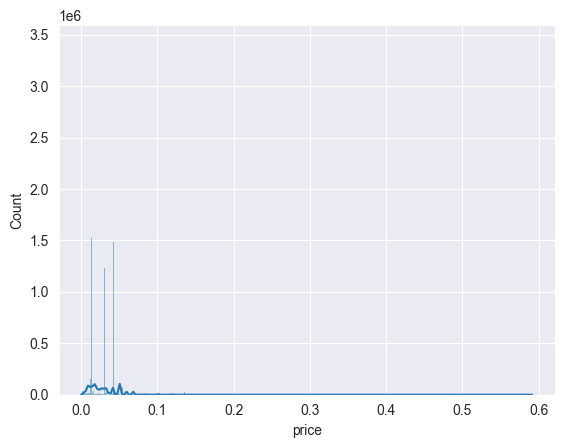

In [42]:
sns.histplot(transactions_train["price"], kde=True)


Assuming the prices were normalized, it does make sense.


Finally, we check the dates of these transactions:

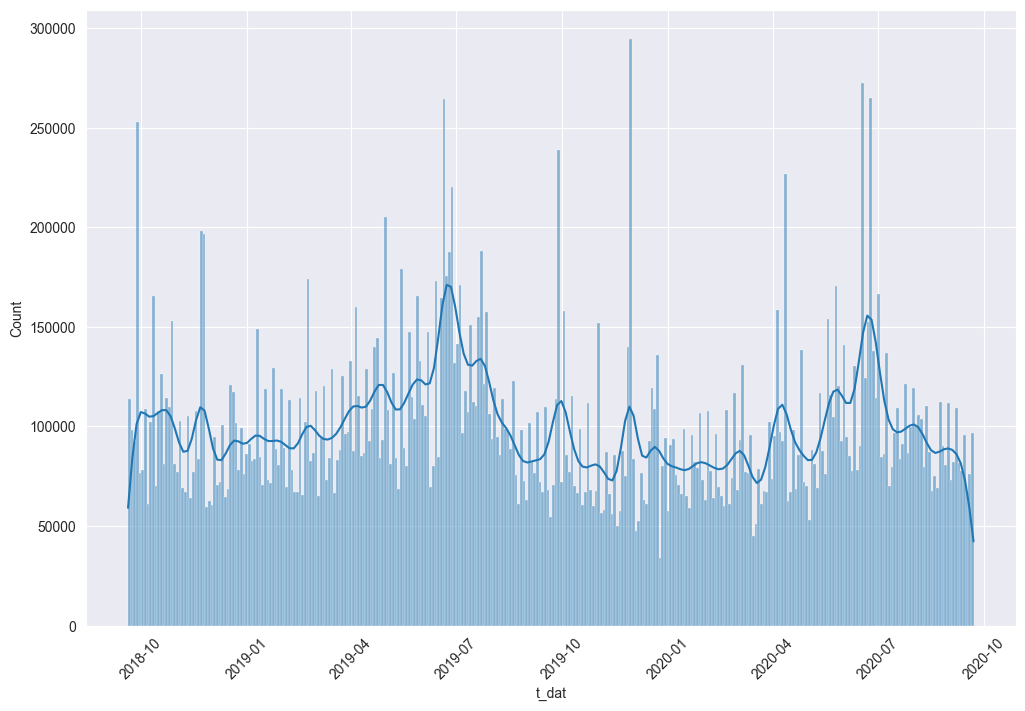

In [43]:
dates = pd.to_datetime(transactions_train["t_dat"]) # too many dates on the x-axis, this reduces it
plt.figure(figsize=(12, 8))

sns.histplot(dates, kde=True)
plt.xticks(rotation=45)
plt.show()


The dates also make sense, they range from 2018 - 2020 and there are no abnormalities.

# Sample submission

In [48]:
sample_submission.head()

,customer_id,prediction
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,0706016001 0706016002 0372860001 0610776002 07...
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,0706016001 0706016002 0372860001 0610776002 07...
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,0706016001 0706016002 0372860001 0610776002 07...
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,0706016001 0706016002 0372860001 0610776002 07...
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,0706016001 0706016002 0372860001 0610776002 07...


In [49]:
missing_values(sample_submission)


We check whether all these customers exist in Customers

In [50]:
sample_submission["customer_id"].isin(customers["customer_id"]).value_counts(normalize=True)


customer_id
True    1.0
Name: proportion, dtype: float64

They do.

In [51]:
sample_submission["prediction"].value_counts()


prediction
0706016001 0706016002 0372860001 0610776002 0759871002 0464297007 0372860002 0610776001 0399223001 0706016003 0720125001 0156231001    1371980
Name: count, dtype: int64

We can see that there is only 1 prediction. The article IDs also seem correct, as they are all 10 digits long.